In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

# Portfolio Analysis for Fama48 (monthly returns)

This notebook analyses the results of different covariance estimators on the Fama 48 industry portfolio dataset (run using the script `portfolio_optim.py`) for different strides. We start investing in January 1974. We use the last 50 months to estimate the covariance matrix, this is then used for the next `stride` months. Afterwards, we repeat the process. Below, we give a graphical representation of the method. For each window (orange), we estimate the covariance matrix using data from the preceeding 50 months. This is then used for portfolio allocation. Afterwards, we use this portfolio for the next `stride` months.

![alt text](plots/plot_setup.pdf "Title")

All result plots contain the stride parameter on the x-axis.

In [3]:
df = pd.read_csv('results_fama48_stride.csv')

In [4]:
df.method.unique()

array(['Empirical', 'Linear', 'Linear Diagonal', 'Wasserstein', 'KL',
       'Fisher-Rao'], dtype=object)

In [5]:
df.loc[df['method']=='Linear', 'method'] = 'Linear Shrinkage'
df.loc[df['method']=='NLLW', 'method'] = 'Nonlinear LW'
df.loc[df['method']=='Fisher-Rao', 'method'] = 'Fisher-Rao'
df.loc[df['method']=='KL', 'method'] = 'Kullback Leibler'

In [6]:
df.method.unique()

array(['Empirical', 'Linear Shrinkage', 'Wasserstein', 'Kullback Leibler',
       'Fisher-Rao', 'Nonlinear LW'], dtype=object)

In [7]:
df.stride.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
methods = [
    'Empirical',
    'Wasserstein',
    'Kullback Leibler',
    'Fisher-Rao',
    'Nonlinear LW',
    'Linear Shrinkage'
]

In [9]:
df = df[(df['stride']<=12) & (df['method'].isin(methods))]

In [10]:
df['method'][df['method']=='Nonlinear LW'] = 'NLLW'

C:\Users\rychener\AppData\Local\Temp\ipykernel_10600\938984412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['method'][df['method']=='Nonlinear LW'] = 'NLLW'


# Comparison of Sharpe Ratios

In [11]:
df.method.unique()

array(['Empirical', 'Linear Shrinkage', 'Wasserstein', 'Kullback Leibler',
       'Fisher-Rao', 'NLLW'], dtype=object)

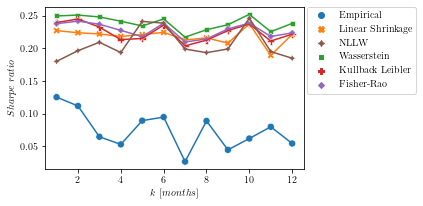

In [12]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='sharpe', hue='method', data=df, legend=False, ax=ax)
sns.scatterplot(x='stride', y='sharpe', hue='method', style='method', data=df, s=50, ax=ax)
plt.xlabel(r'$k\ [months]$')
plt.ylabel(r'$Sharpe\ ratio$')
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,1,5, 2, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/fama_sharpe.pdf', bbox_inches='tight')

# Comparison of Mean Returns

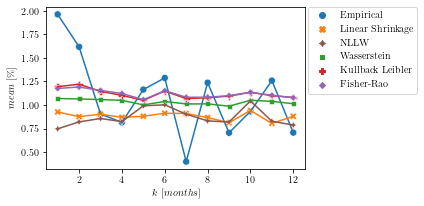

In [13]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='mean', hue='method', data=df, legend=False, ax=ax)
sns.scatterplot(x='stride', y='mean', hue='method', style='method', data=df, s=50, ax=ax)
plt.xlabel(r'$k\ [months]$')
plt.ylabel(r'$mean\ [\%]$')
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,1,5, 2, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.savefig('plots/fama_mean.pdf', bbox_inches='tight')

# Comparison of Return Standard Deviation

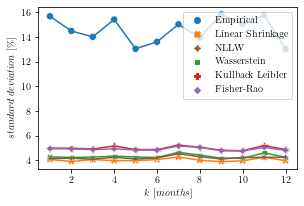

In [14]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
sns.lineplot(x='stride', y='std', hue='method', data=df, legend=False, ax=ax)
sns.scatterplot(x='stride', y='std', hue='method', style='method', data=df, s=50, ax=ax)
plt.xlabel(r'$k\ [months]$')
plt.ylabel(r'$standard\ deviation\ [\%]$')
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [0,1,5, 2, 3, 4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper right')
plt.savefig('plots/fama_std.pdf', bbox_inches='tight')